# Process bulk counts table

1. Annotate columns (samples) in a way that time point and replicate are annotated
2. Remove rRNA genes
3. Perform TPM normalization and alternatively also raw counts

In [1]:
# Use miniconda environment Jupyter_new for running this notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from tools import *
import warnings
warnings.filterwarnings('ignore')

## 1 Load the dataset and annotation

In [2]:
bulkPath = '../nf_output_2/countData/countData.tsv'
metaPath = '../SraRunTable.csv' # metadata from SRA
gffPath = '../nf_output_2/alignments/dualGenome.gff3' # output from nf pipeline

In [3]:
# Load and filter data
df_initial = pd.read_csv(bulkPath, sep = '\t', comment='#', index_col=0)
metadata = pd.read_csv(metaPath)

#acc_drop = metadata[metadata["genotype"] == "rpoC G17D"]["Run"].tolist()
#acc_drop = [acc + "_sorted.bam" for acc in acc_drop]
#df_initial.drop(columns=acc_drop, inplace=True)
#metadata = metadata[metadata['genotype'] == 'WT']

In [4]:
df_initial

,Chr,Start,End,Strand,Length,SRR23266583_sorted.bam,SRR23266593_sorted.bam,SRR23266592_sorted.bam,SRR23266590_sorted.bam,SRR23266587_sorted.bam,SRR23266584_sorted.bam,SRR23266588_sorted.bam,SRR23266591_sorted.bam,SRR23266582_sorted.bam,SRR23266586_sorted.bam,SRR23266589_sorted.bam,SRR23266585_sorted.bam
Geneid,,,,,,,,,,,,,,,,,
gene-PA0001,NC_002516.2,483,2027,+,1545,2982,3107,3202,3213,3236,2960,3318,3438,3666,3590,3651,3342
gene-PA0002,NC_002516.2,2056,3159,+,1104,3739,3786,3974,4015,3943,3613,3850,4420,4286,4488,4723,4053
gene-PA0003,NC_002516.2,3169,4278,+,1110,1497,1661,1614,1569,2029,1487,1741,1732,2068,1796,1837,1810
gene-PA0004,NC_002516.2,4275,6695,+,2421,6368,6730,6598,7181,6502,6905,6992,7677,7066,7554,7936,7395
gene-PA0005,NC_002516.2,7018,7791,-,774,161,151,207,178,257,155,205,185,256,219,211,212
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
gene-PHIKZ302,NC_004629.1,273499,273951,-,453,34,43,36,26,0,29,29,39,0,28,40,40
gene-PHIKZ303,NC_004629.1,274165,276105,-,1941,424,575,824,570,0,850,617,562,0,523,777,780
gene-PHIKZ304,NC_004629.1,276191,276604,-,414,48,45,37,34,0,59,52,58,0,59,30,42


In [5]:
df_initial

,Chr,Start,End,Strand,Length,SRR23266583_sorted.bam,SRR23266593_sorted.bam,SRR23266592_sorted.bam,SRR23266590_sorted.bam,SRR23266587_sorted.bam,SRR23266584_sorted.bam,SRR23266588_sorted.bam,SRR23266591_sorted.bam,SRR23266582_sorted.bam,SRR23266586_sorted.bam,SRR23266589_sorted.bam,SRR23266585_sorted.bam
Geneid,,,,,,,,,,,,,,,,,
gene-PA0001,NC_002516.2,483,2027,+,1545,2982,3107,3202,3213,3236,2960,3318,3438,3666,3590,3651,3342
gene-PA0002,NC_002516.2,2056,3159,+,1104,3739,3786,3974,4015,3943,3613,3850,4420,4286,4488,4723,4053
gene-PA0003,NC_002516.2,3169,4278,+,1110,1497,1661,1614,1569,2029,1487,1741,1732,2068,1796,1837,1810
gene-PA0004,NC_002516.2,4275,6695,+,2421,6368,6730,6598,7181,6502,6905,6992,7677,7066,7554,7936,7395
gene-PA0005,NC_002516.2,7018,7791,-,774,161,151,207,178,257,155,205,185,256,219,211,212
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
gene-PHIKZ302,NC_004629.1,273499,273951,-,453,34,43,36,26,0,29,29,39,0,28,40,40
gene-PHIKZ303,NC_004629.1,274165,276105,-,1941,424,575,824,570,0,850,617,562,0,523,777,780
gene-PHIKZ304,NC_004629.1,276191,276604,-,414,48,45,37,34,0,59,52,58,0,59,30,42


In [6]:
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_rows', 20)
metadata

,Run,Assay Type,AvgSpotLen,Bases,BioProject,BioSample,Bytes,cell_type,Center Name,Collection_Date,Consent,DATASTORE filetype,DATASTORE provider,DATASTORE region,Experiment,genotype,geo_loc_name_country,geo_loc_name_country_continent,geo_loc_name,Instrument,Library Name,LibraryLayout,LibrarySelection,LibrarySource,Organism,Platform,ReleaseDate,create_date,version,Sample Name,source_name,SRA Study,strain,tissue,treatment
0,SRR23266582,RNA-Seq,74,610744758,PRJNA929253,SAMN32954162,302267519,bacteria,"JÖRG VOGEL LAB, INSTITUTE FOR MOLECULAR INFECT...",missing,public,"fastq,run.zq,sra","gs,ncbi,s3","gs.us-east1,ncbi.public,s3.us-east-1",SRX19210772,wt,uncalculated,uncalculated,missing,NextSeq 500,GSM7009110,SINGLE,cDNA,TRANSCRIPTOMIC,Pseudomonas aeruginosa PAO1,ILLUMINA,2024-01-16T00:00:00Z,2023-01-29T13:16:00Z,1,GSM7009110,bacterial cells,SRP419936,PAO1,bacterial cells,"M9 minimal media\, non-infected cells"
1,SRR23266583,RNA-Seq,77,548473243,PRJNA929253,SAMN32954163,275987247,bacteria,"JÖRG VOGEL LAB, INSTITUTE FOR MOLECULAR INFECT...",missing,public,"fastq,run.zq,sra","gs,ncbi,s3","gs.us-east1,ncbi.public,s3.us-east-1",SRX19210771,wt,uncalculated,uncalculated,missing,NextSeq 500,GSM7009109,SINGLE,cDNA,TRANSCRIPTOMIC,Pseudomonas aeruginosa PAO1,ILLUMINA,2024-01-16T00:00:00Z,2023-02-01T02:26:00Z,1,GSM7009109,bacterial cells,SRP419936,PAO1,bacterial cells,"M9 minimal media\, 8 min post infection with P..."
2,SRR23266584,RNA-Seq,80,574200253,PRJNA929253,SAMN32954164,283251351,bacteria,"JÖRG VOGEL LAB, INSTITUTE FOR MOLECULAR INFECT...",missing,public,"fastq,run.zq,sra","gs,ncbi,s3","gs.us-east1,ncbi.public,s3.us-east-1",SRX19210770,wt,uncalculated,uncalculated,missing,NextSeq 500,GSM7009108,SINGLE,cDNA,TRANSCRIPTOMIC,Pseudomonas aeruginosa PAO1,ILLUMINA,2024-01-16T00:00:00Z,2023-01-29T13:16:00Z,1,GSM7009108,bacterial cells,SRP419936,PAO1,bacterial cells,"M9 minimal media\, 6 min post infection with P..."
3,SRR23266585,RNA-Seq,76,654115904,PRJNA929253,SAMN32954165,325321131,bacteria,"JÖRG VOGEL LAB, INSTITUTE FOR MOLECULAR INFECT...",missing,public,"fastq,run.zq,sra","gs,ncbi,s3","gs.us-east1,ncbi.public,s3.us-east-1",SRX19210769,wt,uncalculated,uncalculated,missing,NextSeq 500,GSM7009107,SINGLE,cDNA,TRANSCRIPTOMIC,Pseudomonas aeruginosa PAO1,ILLUMINA,2024-01-16T00:00:00Z,2023-02-01T02:38:00Z,1,GSM7009107,bacterial cells,SRP419936,PAO1,bacterial cells,"M9 minimal media\, 4 min post infection with P..."
4,SRR23266586,RNA-Seq,74,639968865,PRJNA929253,SAMN32954167,322388931,bacteria,"JÖRG VOGEL LAB, INSTITUTE FOR MOLECULAR INFECT...",missing,public,"fastq,run.zq,sra","gs,ncbi,s3","gs.us-east1,ncbi.public,s3.us-east-1",SRX19210767,wt,uncalculated,uncalculated,missing,NextSeq 500,GSM7009105,SINGLE,cDNA,TRANSCRIPTOMIC,Pseudomonas aeruginosa PAO1,ILLUMINA,2024-01-16T00:00:00Z,2023-02-01T02:41:00Z,1,GSM7009105,bacterial cells,SRP419936,PAO1,bacterial cells,"M9 minimal media\, 10 min post infection with ..."
5,SRR23266587,RNA-Seq,73,565453451,PRJNA929253,SAMN32954168,281658337,bacteria,"JÖRG VOGEL LAB, INSTITUTE FOR MOLECULAR INFECT...",missing,public,"fastq,run.zq,sra","gs,ncbi,s3","gs.us-east1,ncbi.public,s3.us-east-1",SRX19210766,wt,uncalculated,uncalculated,missing,NextSeq 500,GSM7009104,SINGLE,cDNA,TRANSCRIPTOMIC,Pseudomonas aeruginosa PAO1,ILLUMINA,2024-01-16T00:00:00Z,2023-01-29T13:17:00Z,1,GSM7009104,bacterial cells,SRP419936,PAO1,bacterial cells,"M9 minimal media\, non-infected cells"
6,SRR23266588,RNA-Seq,81,626878919,PRJNA929253,SAMN32954169,308749208,bacteria,"JÖRG VOGEL LAB, INSTITUTE FOR MOLECULAR INFECT...",missing,public,"fastq,run.zq,sra","gs,ncbi,s3","gs.us-east1,ncbi.public,s3.us-east-1",SRX19210765,wt,uncalculated,uncalculated,missing,NextSeq 500,GSM7009103,SINGLE,cDNA,TRANSCRIPTOMIC,Pseudomonas aeruginosa PAO1,ILLUMINA,2024-01-16T00:00:00Z,2023-01-29T13:17:00Z,1,GSM7009103,bacterial cells,SRP419936,PAO1,bacterial cells,"M9 minimal media\, 8 min post infection with P..."
7,SRR23266589,RNA-Seq,73,630024080,PRJNA929253,SAMN3

## 2 Format the dataset

### 2.1 Annotate sample names

Issue now is that the metadata does not properly annotate sample names. Thus, this will be done manually by adding another sample name column to the metadata.

In [7]:
# Match GSM IDs and SampleNames inferred from GEO

sampleDict = {'GSM7009099': '10_R1',  'GSM7009100': '2_R1',
              'GSM7009101': '4_R1',  'GSM7009102': '6_R1',
              'GSM7009103': '8_R1',  'GSM7009104': '0_R1',
              'GSM7009105': '10_R2',  'GSM7009106': '2_R2',
              'GSM7009107': '4_R2',  'GSM7009108': '6_R2',
              'GSM7009109': '8_R2',  'GSM7009110': '0_R2'
}

In [8]:
metadataFull = annotateData(metadata, sampleDict)

In [9]:
metadata.head(1)

,Run,Assay Type,AvgSpotLen,Bases,BioProject,BioSample,Bytes,cell_type,Center Name,Collection_Date,Consent,DATASTORE filetype,DATASTORE provider,DATASTORE region,Experiment,genotype,geo_loc_name_country,geo_loc_name_country_continent,geo_loc_name,Instrument,Library Name,LibraryLayout,LibrarySelection,LibrarySource,Organism,Platform,ReleaseDate,create_date,version,Sample Name,source_name,SRA Study,strain,tissue,treatment
0,SRR23266582,RNA-Seq,74,610744758,PRJNA929253,SAMN32954162,302267519,bacteria,"JÖRG VOGEL LAB, INSTITUTE FOR MOLECULAR INFECT...",missing,public,"fastq,run.zq,sra","gs,ncbi,s3","gs.us-east1,ncbi.public,s3.us-east-1",SRX19210772,wt,uncalculated,uncalculated,missing,NextSeq 500,GSM7009110,SINGLE,cDNA,TRANSCRIPTOMIC,Pseudomonas aeruginosa PAO1,ILLUMINA,2024-01-16T00:00:00Z,2023-01-29T13:16:00Z,1,GSM7009110,bacterial cells,SRP419936,PAO1,bacterial cells,"M9 minimal media\, non-infected cells"


In [10]:
metadataFull.head()

,Run,Assay Type,AvgSpotLen,Bases,BioProject,BioSample,Bytes,cell_type,Center Name,Collection_Date,Consent,DATASTORE filetype,DATASTORE provider,DATASTORE region,Experiment,genotype,geo_loc_name_country,geo_loc_name_country_continent,geo_loc_name,Instrument,Library Name,LibraryLayout,LibrarySelection,LibrarySource,Organism,Platform,ReleaseDate,create_date,version,Sample Name,source_name,SRA Study,strain,tissue,treatment,SampleID,SampleNames
SampleID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
SRR23266582_sorted.bam,SRR23266582,RNA-Seq,74,610744758,PRJNA929253,SAMN32954162,302267519,bacteria,"JÖRG VOGEL LAB, INSTITUTE FOR MOLECULAR INFECT...",missing,public,"fastq,run.zq,sra","gs,ncbi,s3","gs.us-east1,ncbi.public,s3.us-east-1",SRX19210772,wt,uncalculated,uncalculated,missing,NextSeq 500,GSM7009110,SINGLE,cDNA,TRANSCRIPTOMIC,Pseudomonas aeruginosa PAO1,ILLUMINA,2024-01-16T00:00:00Z,2023-01-29T13:16:00Z,1,GSM7009110,bacterial cells,SRP419936,PAO1,bacterial cells,"M9 minimal media\, non-infected cells",SRR23266582_sorted.bam,0_R2
SRR23266583_sorted.bam,SRR23266583,RNA-Seq,77,548473243,PRJNA929253,SAMN32954163,275987247,bacteria,"JÖRG VOGEL LAB, INSTITUTE FOR MOLECULAR INFECT...",missing,public,"fastq,run.zq,sra","gs,ncbi,s3","gs.us-east1,ncbi.public,s3.us-east-1",SRX19210771,wt,uncalculated,uncalculated,missing,NextSeq 500,GSM7009109,SINGLE,cDNA,TRANSCRIPTOMIC,Pseudomonas aeruginosa PAO1,ILLUMINA,2024-01-16T00:00:00Z,2023-02-01T02:26:00Z,1,GSM7009109,bacterial cells,SRP419936,PAO1,bacterial cells,"M9 minimal media\, 8 min post infection with P...",SRR23266583_sorted.bam,8_R2
SRR23266584_sorted.bam,SRR23266584,RNA-Seq,80,574200253,PRJNA929253,SAMN32954164,283251351,bacteria,"JÖRG VOGEL LAB, INSTITUTE FOR MOLECULAR INFECT...",missing,public,"fastq,run.zq,sra","gs,ncbi,s3","gs.us-east1,ncbi.public,s3.us-east-1",SRX19210770,wt,uncalculated,uncalculated,missing,NextSeq 500,GSM7009108,SINGLE,cDNA,TRANSCRIPTOMIC,Pseudomonas aeruginosa PAO1,ILLUMINA,2024-01-16T00:00:00Z,2023-01-29T13:16:00Z,1,GSM7009108,bacterial cells,SRP419936,PAO1,bacterial cells,"M9 minimal media\, 6 min post infection with P...",SRR23266584_sorted.bam,6_R2
SRR23266585_sorted.bam,SRR23266585,RNA-Seq,76,654115904,PRJNA929253,SAMN32954165,325321131,bacteria,"JÖRG VOGEL LAB, INSTITUTE FOR MOLECULAR INFECT...",missing,public,"fastq,run.zq,sra","gs,ncbi,s3","gs.us-east1,ncbi.public,s3.us-east-1",SRX19210769,wt,uncalculated,uncalculated,missing,NextSeq 500,GSM7009107,SINGLE,cDNA,TRANSCRIPTOMIC,Pseudomonas aeruginosa PAO1,ILLUMINA,2024-01-16T00:00:00Z,2023-02-01T02:38:00Z,1,GSM7009107,bacterial cells,SRP419936,PAO1,bacterial cells,"M9 minimal media\, 4 min post infection with P...",SRR23266585_sorted.bam,4_R2
SRR23266586_sorted.bam,SRR23266586,RNA-Seq,74,639968865,PRJNA929253,SAMN32954167,322388931,bacteria,"JÖRG VOGEL LAB, INSTITUTE FOR MOLECULAR INFECT...",missing,public,"fastq,run.zq,sra","gs,ncbi,s3","gs.us-east1,ncbi.public,s3.us-east-1",SRX19210767,wt,uncalculated,uncalculated,missing,NextSeq 500,GSM7009105,SINGLE,cDNA,TRANSCRIPTOMIC,Pseudomonas aeruginosa PAO1,ILLUMINA,2024-01-16T00:00:00Z,2023-02-01T02:41:00Z,1,GSM7009105,bacterial cells,SRP419936,PAO1,bacterial cells,"M9 minimal media\, 10 min post infection with ...",SRR23266586_sorted.bam,10_R2


In [11]:
metadataFull.index

Index(['SRR23266582_sorted.bam', 'SRR23266583_sorted.bam',
       'SRR23266584_sorted.bam', 'SRR23266585_sorted.bam',
       'SRR23266586_sorted.bam', 'SRR23266587_sorted.bam',
       'SRR23266588_sorted.bam', 'SRR23266589_sorted.bam',
       'SRR23266590_sorted.bam', 'SRR23266591_sorted.bam',
       'SRR23266592_sorted.bam', 'SRR23266593_sorted.bam'],
      dtype='object', name='SampleID')

In [12]:
df_initial

,Chr,Start,End,Strand,Length,SRR23266583_sorted.bam,SRR23266593_sorted.bam,SRR23266592_sorted.bam,SRR23266590_sorted.bam,SRR23266587_sorted.bam,SRR23266584_sorted.bam,SRR23266588_sorted.bam,SRR23266591_sorted.bam,SRR23266582_sorted.bam,SRR23266586_sorted.bam,SRR23266589_sorted.bam,SRR23266585_sorted.bam
Geneid,,,,,,,,,,,,,,,,,
gene-PA0001,NC_002516.2,483,2027,+,1545,2982,3107,3202,3213,3236,2960,3318,3438,3666,3590,3651,3342
gene-PA0002,NC_002516.2,2056,3159,+,1104,3739,3786,3974,4015,3943,3613,3850,4420,4286,4488,4723,4053
gene-PA0003,NC_002516.2,3169,4278,+,1110,1497,1661,1614,1569,2029,1487,1741,1732,2068,1796,1837,1810
gene-PA0004,NC_002516.2,4275,6695,+,2421,6368,6730,6598,7181,6502,6905,6992,7677,7066,7554,7936,7395
gene-PA0005,NC_002516.2,7018,7791,-,774,161,151,207,178,257,155,205,185,256,219,211,212
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
gene-PHIKZ302,NC_004629.1,273499,273951,-,453,34,43,36,26,0,29,29,39,0,28,40,40
gene-PHIKZ303,NC_004629.1,274165,276105,-,1941,424,575,824,570,0,850,617,562,0,523,777,780
gene-PHIKZ304,NC_004629.1,276191,276604,-,414,48,45,37,34,0,59,52,58,0,59,30,42


Add correct sample names.

In [13]:
df_initial.iloc[:,5:df_initial.shape[1]].columns

Index(['SRR23266583_sorted.bam', 'SRR23266593_sorted.bam',
       'SRR23266592_sorted.bam', 'SRR23266590_sorted.bam',
       'SRR23266587_sorted.bam', 'SRR23266584_sorted.bam',
       'SRR23266588_sorted.bam', 'SRR23266591_sorted.bam',
       'SRR23266582_sorted.bam', 'SRR23266586_sorted.bam',
       'SRR23266589_sorted.bam', 'SRR23266585_sorted.bam'],
      dtype='object')

In [14]:
metadataFull.index

Index(['SRR23266582_sorted.bam', 'SRR23266583_sorted.bam',
       'SRR23266584_sorted.bam', 'SRR23266585_sorted.bam',
       'SRR23266586_sorted.bam', 'SRR23266587_sorted.bam',
       'SRR23266588_sorted.bam', 'SRR23266589_sorted.bam',
       'SRR23266590_sorted.bam', 'SRR23266591_sorted.bam',
       'SRR23266592_sorted.bam', 'SRR23266593_sorted.bam'],
      dtype='object', name='SampleID')

In [15]:
df = changeColnames(df_initial.iloc[:,5:df_initial.shape[1]], metadataFull)
df = df[['0_R1', '0_R2',
         '2_R1', '2_R2',
         '4_R1', '4_R2',
         '6_R1', '6_R2',
         '8_R1', '8_R2',
         '10_R1', '10_R2']]
df.head()

SampleNames,0_R1,0_R2,2_R1,2_R2,4_R1,4_R2,6_R1,6_R2,8_R1,8_R2,10_R1,10_R2
Geneid,,,,,,,,,,,,
gene-PA0001,3236,3666,3202,3651,3438,3342,3213,2960,3318,2982,3107,3590
gene-PA0002,3943,4286,3974,4723,4420,4053,4015,3613,3850,3739,3786,4488
gene-PA0003,2029,2068,1614,1837,1732,1810,1569,1487,1741,1497,1661,1796
gene-PA0004,6502,7066,6598,7936,7677,7395,7181,6905,6992,6368,6730,7554
gene-PA0005,257,256,207,211,185,212,178,155,205,161,151,219


### 2.2 Remove rRNA genes

Consult gff3 file to get rRNA geneids.

In [16]:
# Load gff3 and split into genes and CDS dfs
gff3 = pd.read_csv(gffPath, sep='\t', header = None, skiprows = 5)
gff3.columns=["seq_id", "source", "type", "start", "end", "phase", "strand", "score", "attributes"]
gff3_genes = gff3.loc[gff3["type"] == 'gene']

# Column formating for genes
gff3_genes = gff3_genes.reset_index(drop=True)
dct_genes = gff3_genes["attributes"].str.split(';').apply(lambda items: dict(item.split('=', 1) for item in items if '=' in item))
cols_to_keep = ['ID', 'Name', 'gbkey', 'gene_biotype', 'locus_tag', 'gene']
gff3_genes = pd.concat([gff3_genes, pd.json_normalize(dct_genes)[cols_to_keep]], axis=1)

# Generate locus_tag, product dictonary over all different feature types
attrs = gff3["attributes"].str.split(";", expand=True)
attrs_dicts = attrs.apply(lambda row: {item.split("=")[0]: item.split("=")[1] for item in row if "=" in str(item)}, axis=1)
attrs_df = pd.json_normalize(attrs_dicts)
attrs_df = attrs_df.dropna(subset=["locus_tag", "product"])
locus_product_dict = dict(zip(attrs_df["locus_tag"], attrs_df["product"]))

# Add gene product, if not stated in gff3, fill with gene_biotype
gff3_genes["product"] = gff3_genes["locus_tag"].map(locus_product_dict)
# gff3_genes["product"] = gff3_genes["product"].fillna("other")
gff3_genes["product"] = gff3_genes["product"].fillna(gff3_genes["gene_biotype"])

# If gene = NA, take from ID column
gff3_genes["gene"] = gff3_genes["gene"].fillna(gff3_genes["ID"])

# Drop attributes column
gff3_genes = gff3_genes.drop(["attributes"], axis=1)

In [17]:
pharokka_path = "../../../2025-12_reannotation_phage_genomes/Pharokka_proteins_phages_out/NC_004629.1_out/pharokka_proteins_full_merged_output.tsv"
gff3_genes = add_pharokka(gff3_genes, pharokka_path)
gff3_genes.loc[gff3_genes['seq_id'] == "NC_004629.1"]

,seq_id,source,type,start,end,phase,strand,score,ID,Name,gbkey,gene_biotype,locus_tag,gene,product,annot,PHROG,category
5678,NC_004629.1,RefSeq,gene,164.0,553.0,.,+,.,gene-PHIKZ001,PHIKZ001,Gene,protein_coding,PHIKZ001,gene-PHIKZ001,PHIKZ001,hypothetical protein,No_PHROG,unknown function
5679,NC_004629.1,RefSeq,gene,517.0,1101.0,.,+,.,gene-PHIKZ002,PHIKZ002,Gene,protein_coding,PHIKZ002,gene-PHIKZ002,PHIKZ002,hypothetical protein,16439,unknown function
5680,NC_004629.1,RefSeq,gene,1076.0,1582.0,.,+,.,gene-PHIKZ003,PHIKZ003,Gene,protein_coding,PHIKZ003,gene-PHIKZ003,PHIKZ003,hypothetical protein,27208,unknown function
5681,NC_004629.1,RefSeq,gene,1582.0,2103.0,.,+,.,gene-PHIKZ004,PHIKZ004,Gene,protein_coding,PHIKZ004,gene-PHIKZ004,dihydrofolate reductase,dihydrofolate reductase,316,"DNA, RNA and nucleotide metabolism"
5682,NC_004629.1,RefSeq,gene,2220.0,2624.0,.,+,.,gene-PHIKZ005,PHIKZ005,Gene,protein_coding,PHIKZ005,gene-PHIKZ005,PHIKZ005,hypothetical protein,7672,unknown function
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6049,NC_004629.1,RefSeq,gene,273499.0,273951.0,.,-,.,gene-PHIKZ302,PHIKZ302,Gene,protein_coding,PHIKZ302,gene-PHIKZ302,PHIKZ302,hypothetical protein,22034,unknown function
6050,NC_004629.1,RefSeq,gene,274165.0,276105.0,.,-,.,gene-PHIKZ303,PHIKZ303,Gene,protein_coding,PHIKZ303,gene-PHIKZ303,virion structural protein,virion structural protein,24656,head and packaging
6051,NC_004629.1,RefSeq,gene,276191.0,276604.0,.,-,.,gene-PHIKZ304,PHIKZ304,Gene,protein_coding,PHIKZ304,gene-PHIKZ304,glycine zipper 2TM domain-containing protein,hypothetical protein,15869,unknown function
6052,NC_004629.1,RefSeq,gene,276601.0,277764.0,.,-,.,gene-PHIKZ305,PHIKZ305,Gene,protein_coding,PHIKZ305,gene-PHIKZ305,ribonucleotide-diphosphate reductase subunit beta,ribonucleoside diphosphate reductase small sub...,86,"DNA, RNA and nucleotide metabolism"


In [18]:
# Load ggf3 file

gff3 = pd.read_csv(gffPath, sep='\t', header = None, skiprows = 5)
gff3 = gff3.loc[gff3.iloc[:,2] == 'gene']

# Format some new columns
gff3['ID'] = pd.DataFrame(gff3.iloc[:,8].str.split('ID=', expand = True)).iloc[:,1].str.split(';', expand = True).iloc[:,0]
gff3['GeneType'] = pd.DataFrame(gff3.iloc[:,8].str.split('gene_biotype=', expand = True)).iloc[:,1].str.split(';', expand = True).iloc[:,0]
gff3['Symbol'] = pd.DataFrame(gff3.iloc[:,8].str.split('gene=', expand = True)).iloc[:,1].str.split(';', expand = True).iloc[:,0]

# Add entity host and phage
gff3['Entity'] = np.where(gff3[0] == 'NC_002516.2', 'host', 'phage')
gff3.index = gff3['ID']
rRNAs = gff3.loc[gff3['GeneType'] == 'rRNA', 'ID'].tolist()

In [19]:
gff3

,0,1,2,3,4,5,6,7,8,ID,GeneType,Symbol,Entity
ID,,,,,,,,,,,,,
gene-PA0001,NC_002516.2,RefSeq,gene,483.0,2027.0,.,+,.,ID=gene-PA0001;Dbxref=GeneID:878417;Name=dnaA;...,gene-PA0001,protein_coding,dnaA,host
gene-PA0002,NC_002516.2,RefSeq,gene,2056.0,3159.0,.,+,.,ID=gene-PA0002;Dbxref=GeneID:879244;Name=dnaN;...,gene-PA0002,protein_coding,dnaN,host
gene-PA0003,NC_002516.2,RefSeq,gene,3169.0,4278.0,.,+,.,ID=gene-PA0003;Dbxref=GeneID:879229;Name=recF;...,gene-PA0003,protein_coding,recF,host
gene-PA0004,NC_002516.2,RefSeq,gene,4275.0,6695.0,.,+,.,ID=gene-PA0004;Dbxref=GeneID:879230;Name=gyrB;...,gene-PA0004,protein_coding,gyrB,host
gene-PA0005,NC_002516.2,RefSeq,gene,7018.0,7791.0,.,-,.,ID=gene-PA0005;Dbxref=GeneID:877576;Name=lptA;...,gene-PA0005,protein_coding,lptA,host
...,...,...,...,...,...,...,...,...,...,...,...,...,...
gene-PHIKZ302,NC_004629.1,RefSeq,gene,273499.0,273951.0,.,-,.,ID=gene-PHIKZ302;Dbxref=GeneID:1258400;Name=PH...,gene-PHIKZ302,protein_coding,None,phage
gene-PHIKZ303,NC_004629.1,RefSeq,gene,274165.0,276105.0,.,-,.,ID=gene-PHIKZ303;Dbxref=GeneID:1258398;Name=PH...,gene-PHIKZ303,protein_coding,None,phage
gene-PHIKZ304,NC_004629.1,RefSeq,gene,276191.0,276604.0,.,-,.,ID=gene-PHIKZ304;Dbxref=GeneID:1258396;Name=PH...,gene-PHIKZ304,protein_coding,None,phage


Perform in silico rRNA depletion.

In [20]:
df_norRNAs = rRNAdepletion(df,rRNAs)
df_norRNAs.head()

SampleNames,0_R1,0_R2,2_R1,2_R2,4_R1,4_R2,6_R1,6_R2,8_R1,8_R2,10_R1,10_R2
Geneid,,,,,,,,,,,,
gene-PA0679,9,7,7,4,9,11,4,5,22,8,13,24
gene-PA2712,74,98,85,93,86,91,83,84,86,105,91,106
gene-PA3368,39,32,37,42,56,51,45,29,30,24,34,51
gene-PA2666,264,198,163,155,168,140,129,138,196,190,153,163
gene-PA4583,535,541,527,556,616,508,516,567,568,565,496,567


### 2.3 Read count normalization

Important note: gene symbols not available for most genes.

In [21]:
# Function to fill in missing symbols by geneid.

def fillSymbols(df):
    df_new = df.copy()
    index = df.index.to_list()
    for i in range(0,df.shape[0]):
        if (df.iloc[i,-1:].values == None):
            df_new.iloc[i,-1:] = index[i]
    return df_new

Convert counts to TPM.

In [22]:
tpms = TPM(df_norRNAs, df_initial, 0.5)
tpms['Entity'] = gff3.loc[sorted(tpms.index.to_list()), 'Entity']
tpms['Symbol'] = gff3.loc[sorted(tpms.index.to_list()), 'Symbol']

tpms = fillSymbols(tpms)
tpms = make_unique_with_index(tpms)
tpms

SampleNames,0_R1,0_R2,2_R1,2_R2,4_R1,4_R2,6_R1,6_R2,8_R1,8_R2,10_R1,10_R2,Entity,Symbol
Geneid,,,,,,,,,,,,,,
gene-PA0679,2.699702,1.952076,2.183400,1.151048,2.395514,2.756482,1.201898,1.544671,5.430438,2.371661,3.432465,5.705947,host,gene-PA0679
gene-PA2712,10.585673,12.818634,12.445381,11.958111,10.905894,10.966005,11.150942,11.865880,10.438508,14.718246,11.632242,12.401701,host,gene-PA2712
gene-PA3368,7.281130,5.486917,7.081298,7.051466,9.241301,8.007079,7.882718,5.374088,4.774871,4.434138,5.689852,7.779978,host,gene-PA3368
gene-PA2666,90.956430,62.518932,57.597729,48.131222,51.415090,40.752027,41.854330,47.069389,57.389230,64.319715,47.227642,46.078137,host,gene-PA2666
gene-PA4583,54.107708,50.111965,54.601177,50.612012,55.273341,43.336695,49.049308,56.669136,48.785443,56.101397,44.884777,46.993194,host,gene-PA4583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
gene-PA3179,45.310051,45.276062,45.008509,45.447068,45.459062,41.963192,43.280750,38.195497,41.624936,38.569494,35.524978,40.859670,host,gene-PA3179
gene-PA4215,7.700338,7.858681,7.587903,7.855181,6.832706,6.494937,6.410123,8.189926,6.290744,6.984473,6.102160,7.512767,host,phzF1
gene-PA2952,2189.070573,2263.109111,1963.844430,1942.379901,1656.578332,1424.611383,1364.971503,1501.298720,1079.136570,1190.013319,1061.702611,1010.603747,host,etfB


In [23]:
# Check gene names unique
len(tpms['Symbol'].unique())

6041

Log2+1 normalization raw counts

In [24]:
logs = logNorm(df_norRNAs)
logs['Entity'] = gff3.loc[sorted(logs.index.to_list()), 'Entity']
logs['Symbol'] = gff3.loc[sorted(logs.index.to_list()), 'Symbol']
logs = fillSymbols(logs)
# Make gene names unique
logs = make_unique_with_index(logs)
logs

SampleNames,0_R1,0_R2,2_R1,2_R2,4_R1,4_R2,6_R1,6_R2,8_R1,8_R2,10_R1,10_R2,Entity,Symbol
Geneid,,,,,,,,,,,,,,
gene-PA0679,3.321928,3.000000,3.000000,2.321928,3.321928,3.584963,2.321928,2.584963,4.523562,3.169925,3.807355,4.643856,host,gene-PA0679
gene-PA2712,6.228819,6.629357,6.426265,6.554589,6.442943,6.523562,6.392317,6.409391,6.442943,6.727920,6.523562,6.741467,host,gene-PA2712
gene-PA3368,5.321928,5.044394,5.247928,5.426265,5.832890,5.700440,5.523562,4.906891,4.954196,4.643856,5.129283,5.700440,host,gene-PA3368
gene-PA2666,8.049849,7.636625,7.357552,7.285402,7.400879,7.139551,7.022368,7.118941,7.622052,7.577429,7.266787,7.357552,host,gene-PA2666
gene-PA4583,9.066089,9.082149,9.044394,9.121534,9.269127,8.991522,9.014020,9.149747,9.152285,9.144658,8.957102,9.149747,host,gene-PA4583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
gene-PA3179,8.744834,8.870365,8.700440,8.900867,8.921841,8.879583,8.768184,8.515700,8.857981,8.539159,8.554589,8.882643,host,gene-PA3179
gene-PA4215,5.727920,5.882643,5.672425,5.906891,5.727920,5.727920,5.554589,5.832890,5.672425,5.614710,5.554589,5.977280,host,phzF1
gene-PA2952,13.707143,13.881879,13.515700,13.686501,13.477505,13.333016,13.115206,13.180065,12.922399,12.854284,12.823765,12.879200,host,etfB


Log2+1 normalization tpms

In [25]:
logTPMs = logNorm(tpms.iloc[:, :-2])
logTPMs = logTPMs.join(tpms.iloc[:, -2:])
logTPMs = fillSymbols(logTPMs)
# Make gene names unique
logTPMs = make_unique_with_index(logTPMs)
logTPMs

SampleNames,0_R1,0_R2,2_R1,2_R2,4_R1,4_R2,6_R1,6_R2,8_R1,8_R2,10_R1,10_R2,Entity,Symbol
Geneid,,,,,,,,,,,,,,
gene-PA0679,1.887409,1.561730,1.670569,1.105040,1.763630,1.909382,1.138748,1.347479,2.684917,1.753459,2.148109,2.745441,host,gene-PA0679
gene-PA2712,3.534270,3.788543,3.749039,3.695784,3.573604,3.580870,3.602996,3.685478,3.515827,3.974368,3.659039,3.744344,host,gene-PA2712
gene-PA3368,3.049828,2.697533,3.014587,3.009251,3.356327,3.171059,3.151001,2.672219,2.529789,2.442051,2.741974,3.134217,host,gene-PA3368
gene-PA2666,6.522879,5.989115,5.872773,5.618568,5.711910,5.383774,5.421369,5.587047,5.867630,6.029447,5.591788,5.556985,host,gene-PA2666
gene-PA4583,5.784182,5.675589,5.797044,5.689635,5.814380,5.470429,5.645278,5.849728,5.637652,5.835454,5.519944,5.584758,host,gene-PA4583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
gene-PA3179,5.533253,5.532194,5.523829,5.537516,5.537888,5.425029,5.468608,5.292616,5.413626,5.306317,5.190811,5.387489,host,gene-PA3179
gene-PA4215,3.121071,3.147092,3.102306,3.146522,2.969511,2.905916,2.889497,3.200053,2.866066,2.997197,2.828258,3.089628,host,phzF1
gene-PA2952,11.096762,11.144728,10.940199,10.924352,10.694861,10.477365,10.415712,10.552956,10.076998,10.217974,10.053522,9.982429,host,etfB


## 3 Filter samples, if necessary

Look for outliers visually by PCA.

In [26]:
columnOrder = ['0_R1', '0_R2',
               '2_R1', '2_R2',
               '4_R1', '4_R2',
               '6_R1', '6_R2',
               '8_R1', '8_R2',
               '10_R1', '10_R2']

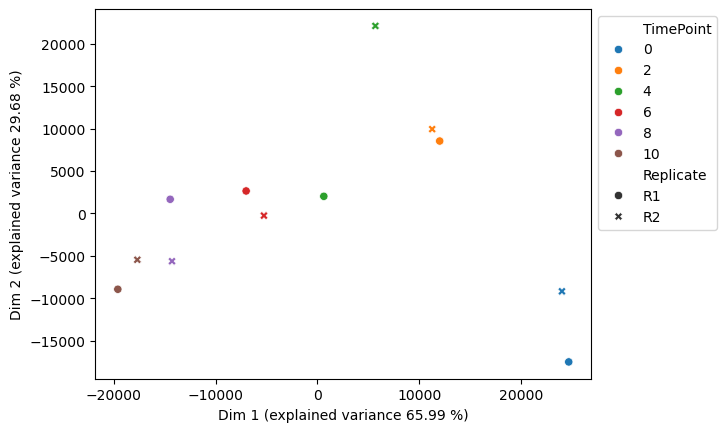

In [27]:
txPCA(tpms[columnOrder])

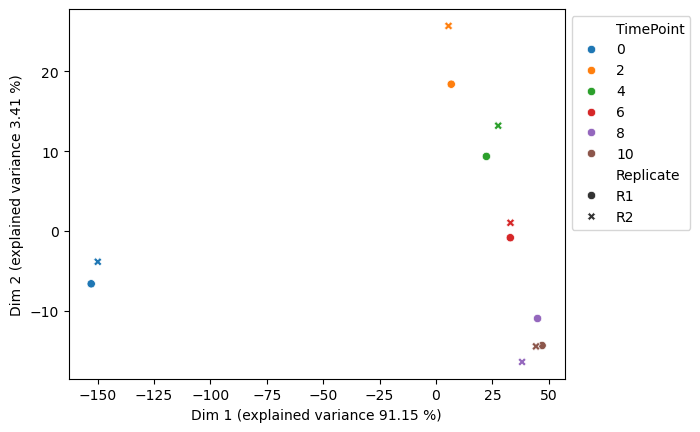

In [28]:
txPCA(logs[columnOrder])

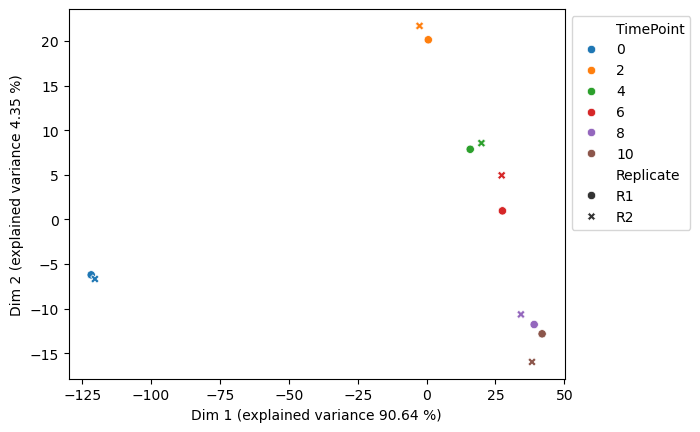

In [29]:
txPCA(logTPMs[columnOrder])

In [30]:
tpmHost = tpms[tpms['Entity'] == 'host']
tpmPhage = tpms[tpms['Entity'] == 'phage']
logTPMsHost = logTPMs[logTPMs['Entity'] == 'host']
logTPMsPhage = logTPMs[logTPMs['Entity'] == 'phage']

tpmHost

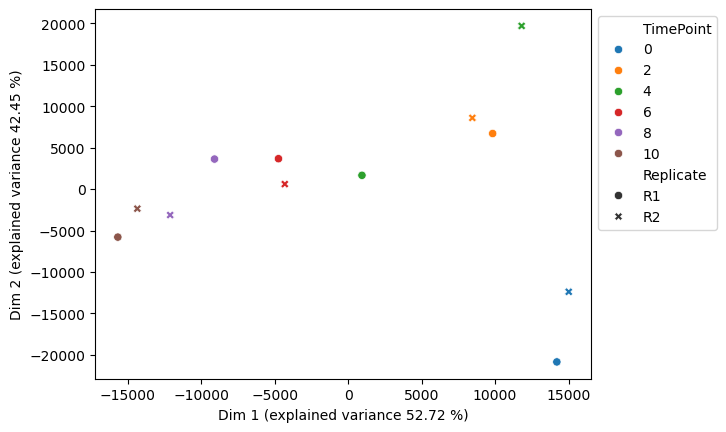

In [31]:
txPCA(tpmHost[columnOrder])

tpmPhage

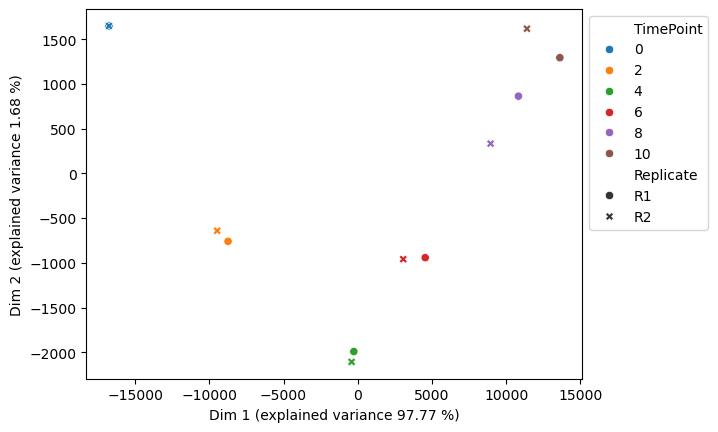

In [32]:
txPCA(tpmPhage[columnOrder])

logTPM Host

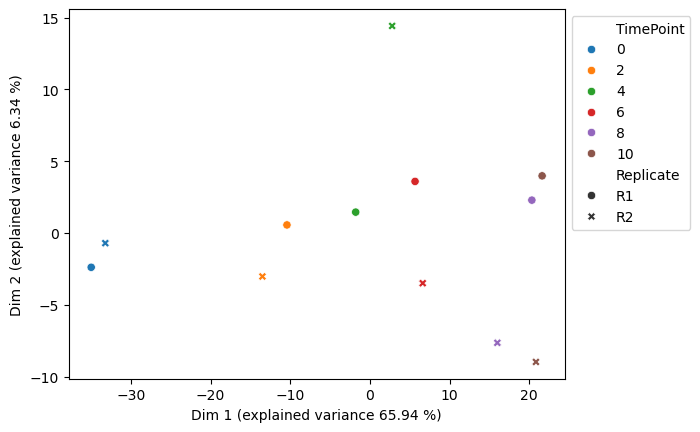

In [33]:
txPCA(logTPMsHost[columnOrder])

logTPM Phage

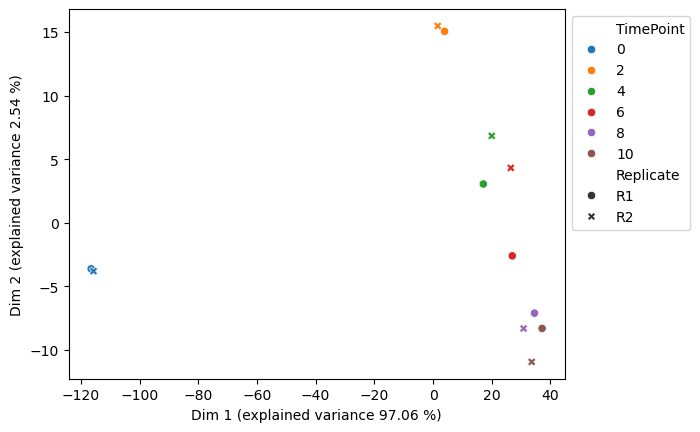

In [34]:
txPCA(logTPMsPhage[columnOrder])

$\rightarrow$ Looks wonderfull <3

## 4. Final grouping

Summarize time points with mean and standard deviation for TPM-normalized data.

In [35]:
TPMmeans, TPMsds = getMeanSD(tpms[columnOrder])
TPMmeans = TPMmeans[['0', '2', '4', '6', '8', '10']]
TPMmeans[['Entity', 'Symbol']] = tpms[['Entity', 'Symbol']]
TPMmeans

,0,2,4,6,8,10,Entity,Symbol
Geneid,,,,,,,,
gene-PA0679,2.325889,1.667224,2.575998,1.373284,3.901049,4.569206,host,gene-PA0679
gene-PA2712,11.702153,12.201746,10.935950,11.508411,12.578377,12.016971,host,gene-PA2712
gene-PA3368,6.384024,7.066382,8.624190,6.628403,4.604505,6.734915,host,gene-PA3368
gene-PA2666,76.737681,52.864476,46.083558,44.461859,60.854473,46.652889,host,gene-PA2666
gene-PA4583,52.109837,52.606595,49.305018,52.859222,52.443420,45.938985,host,gene-PA4583
...,...,...,...,...,...,...,...,...
gene-PA3179,45.293057,45.227789,43.711127,40.738124,40.097215,38.192324,host,gene-PA3179
gene-PA4215,7.779510,7.721542,6.663822,7.300024,6.637608,6.807464,host,phzF1
gene-PA2952,2226.089842,1953.112166,1540.594858,1433.135111,1134.574944,1036.153179,host,etfB


In [36]:
TPMsds = TPMsds[['0', '2', '4', '6', '8', '10']]
TPMsds[['Entity', 'Symbol']] = tpms[['Entity', 'Symbol']]
TPMsds

,0,2,4,6,8,10,Entity,Symbol
Geneid,,,,,,,,
gene-PA0679,0.373813,0.516176,0.180484,0.171386,1.529389,1.136741,host,gene-PA0679
gene-PA2712,1.116480,0.243635,0.030056,0.357469,2.139869,0.384729,host,gene-PA2712
gene-PA3368,0.897107,0.014916,0.617111,1.254315,0.170367,1.045063,host,gene-PA3368
gene-PA2666,14.218749,4.733253,5.331532,2.607530,3.465242,0.574752,host,gene-PA2666
gene-PA4583,1.997872,1.994583,5.968323,3.809914,3.657977,1.054209,host,gene-PA4583
...,...,...,...,...,...,...,...,...
gene-PA3179,0.016994,0.219279,1.747935,2.542627,1.527721,2.667346,host,gene-PA3179
gene-PA4215,0.079172,0.133639,0.168885,0.889902,0.346865,0.705304,host,phzF1
gene-PA2952,37.019269,10.732265,115.983474,68.163608,55.438375,25.549432,host,etfB


In [37]:
propExp = proportionalExp(TPMmeans[['0', '2', '4', '6', '8', '10']])
propExp[['Entity', 'Symbol']] = TPMmeans[['Entity', 'Symbol']]
propExp

,0,2,4,6,8,10,Entity,Symbol
Geneid,,,,,,,,
gene-PA0679,0.509036,0.364883,0.563774,0.300552,0.853770,1.000000,host,gene-PA0679
gene-PA2712,0.930339,0.970057,0.869425,0.914936,1.000000,0.955367,host,gene-PA2712
gene-PA3368,0.740246,0.819368,1.000000,0.768583,0.533906,0.780933,host,gene-PA3368
gene-PA2666,1.000000,0.688899,0.600534,0.579401,0.793019,0.607953,host,gene-PA2666
gene-PA4583,0.985823,0.995221,0.932761,1.000000,0.992134,0.869082,host,gene-PA4583
...,...,...,...,...,...,...,...,...
gene-PA3179,1.000000,0.998559,0.965073,0.899434,0.885284,0.843227,host,gene-PA3179
gene-PA4215,1.000000,0.992549,0.856586,0.938366,0.853217,0.875050,host,phzF1
gene-PA2952,1.000000,0.877373,0.692063,0.643790,0.509672,0.465459,host,etfB


## 5. Phage gene classification

In [38]:
# Add a classification label based on exceeding 20 % of maximal expression

def classLabelThreshold(tpm):
    
    labels = list()
    
    i = 0
    while i < tpm.shape[0]:

        # Get array of expression values at time points
        expressions = list(tpm.iloc[i,0:(tpm.shape[1]-2)])

        # Get maximal value for each gene across time points
        maxTPM = max(expressions)

        # Get the threshold value
        thresHold = maxTPM*0.2

        # Subset expressions based on threshold
        filteredExpressions = [x for x in expressions if x >= thresHold]

        # Get index of time point
        indices = [expressions.index(x) for x in filteredExpressions]
        timePoint = min(indices)

        if timePoint == 0:
            labels.append('None')
        elif timePoint == 1:
            labels.append('early')
        elif timePoint == 2:
            labels.append('early')
        elif timePoint == 3:
            labels.append('middle')
        elif timePoint == 4:
            labels.append('middle')
        elif timePoint == 5:
            labels.append('late')
        elif timePoint == 6:
            labels.append('late')

        i += 1

    tpmOut = tpm.copy()
    tpmOut['ClassThreshold'] = labels
    tpmOut.loc[tpmOut['Entity'] == 'host', 'ClassThreshold'] = 'None'

    return tpmOut

In [39]:
# Add a classification label based on exceeding 20 % of maximal expression

def classLabelMax(tpm):
    
    labels = list()
    
    i = 0
    while i < tpm.shape[0]:

        # Get array of expression values at time points
        expressions = list(tpm.iloc[i,0:(tpm.shape[1]-3)])

        # Get maximal value for each gene across time points
        maxTPM = max(expressions)

        # Get the threshold value
        thresHold = maxTPM

        # Subset expressions based on threshold
        filteredExpressions = [x for x in expressions if x == thresHold]

        # Get index of time point
        indices = [expressions.index(x) for x in filteredExpressions]
        timePoint = min(indices)

        if timePoint == 0:
            labels.append('None')
        elif timePoint == 1:
            labels.append('early')
        elif timePoint == 2:
            labels.append('early')
        elif timePoint == 3:
            labels.append('middle')
        elif timePoint == 4:
            labels.append('middle')
        elif timePoint == 5:
            labels.append('late')
        elif timePoint == 6:
            labels.append('late')

        i += 1

    tpmOut = tpm.copy()
    tpmOut['ClassMax'] = labels
    tpmOut.loc[tpmOut['Entity'] == 'host', 'ClassMax'] = 'None'

    return tpmOut

In [40]:
TPMmeans = classLabelThreshold(TPMmeans)
TPMmeans = classLabelMax(TPMmeans)

In [41]:
TPMmeans["ClassMax"] = None
TPMmeans["ClassThreshold"] = None

In [42]:
TPMmeans[TPMmeans['Entity'] == 'phage']['ClassMax'].value_counts()

Series([], Name: count, dtype: int64)

Add classes to other dfs.

In [43]:
gff3_genes["seq_id"].unique()

array(['NC_002516.2', 'NC_004629.1'], dtype=object)

In [44]:
TPMsds[['ClassThreshold', 'ClassMax']] = TPMmeans[['ClassThreshold', 'ClassMax']]
tpms[['ClassThreshold', 'ClassMax']] = TPMmeans[['ClassThreshold', 'ClassMax']]
logs[['ClassThreshold', 'ClassMax']] = TPMmeans[['ClassThreshold', 'ClassMax']]
propExp[['ClassThreshold', 'ClassMax']] = TPMmeans[['ClassThreshold', 'ClassMax']]

# gff3
gff3_final = gff3_genes.merge(TPMmeans[["ClassThreshold", "ClassMax"]], right_index=True, left_on="ID", how="left")
gff3_host  = gff3_final[gff3_final['seq_id'] == 'NC_002516.2']
gff3_phage = gff3_final[gff3_final['seq_id'] == 'NC_004629.1']

## 6. Add variance to all dataframes

Base variance call on tpms.

In [45]:
def stabilizedVariance(df):
    labels = list()
    
    i = 0
    while i < df.shape[0]:

        # Get array of expression values at time points
        expressions = list(df.iloc[i,0:(df.shape[1]-4)])

        # Get mean expression for the gene
        exprMean = np.mean(np.array(expressions))

        # Get the variance for the gene
        varGene = np.var(np.array(expressions))

        # Stabilized variance
        stableVarGene = varGene/exprMean

        labels.append(stableVarGene)

        i += 1

    tpmOut = df.copy()
    tpmOut['Variance'] = labels

    return tpmOut

In [46]:
tpms

SampleNames,0_R1,0_R2,2_R1,2_R2,4_R1,4_R2,6_R1,6_R2,8_R1,8_R2,10_R1,10_R2,Entity,Symbol,ClassThreshold,ClassMax
Geneid,,,,,,,,,,,,,,,,
gene-PA0679,2.699702,1.952076,2.183400,1.151048,2.395514,2.756482,1.201898,1.544671,5.430438,2.371661,3.432465,5.705947,host,gene-PA0679,None,None
gene-PA2712,10.585673,12.818634,12.445381,11.958111,10.905894,10.966005,11.150942,11.865880,10.438508,14.718246,11.632242,12.401701,host,gene-PA2712,None,None
gene-PA3368,7.281130,5.486917,7.081298,7.051466,9.241301,8.007079,7.882718,5.374088,4.774871,4.434138,5.689852,7.779978,host,gene-PA3368,None,None
gene-PA2666,90.956430,62.518932,57.597729,48.131222,51.415090,40.752027,41.854330,47.069389,57.389230,64.319715,47.227642,46.078137,host,gene-PA2666,None,None
gene-PA4583,54.107708,50.111965,54.601177,50.612012,55.273341,43.336695,49.049308,56.669136,48.785443,56.101397,44.884777,46.993194,host,gene-PA4583,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
gene-PA3179,45.310051,45.276062,45.008509,45.447068,45.459062,41.963192,43.280750,38.195497,41.624936,38.569494,35.524978,40.859670,host,gene-PA3179,None,None
gene-PA4215,7.700338,7.858681,7.587903,7.855181,6.832706,6.494937,6.410123,8.189926,6.290744,6.984473,6.102160,7.512767,host,phzF1,None,None
gene-PA2952,2189.070573,2263.109111,1963.844430,1942.379901,1656.578332,1424.611383,1364.971503,1501.298720,1079.136570,1190.013319,1061.702611,1010.603747,host,etfB,None,None


In [47]:
tpms = stabilizedVariance(tpms)
tpms

SampleNames,0_R1,0_R2,2_R1,2_R2,4_R1,4_R2,6_R1,6_R2,8_R1,8_R2,10_R1,10_R2,Entity,Symbol,ClassThreshold,ClassMax,Variance
Geneid,,,,,,,,,,,,,,,,,
gene-PA0679,2.699702,1.952076,2.183400,1.151048,2.395514,2.756482,1.201898,1.544671,5.430438,2.371661,3.432465,5.705947,host,gene-PA0679,None,None,0.731776
gene-PA2712,10.585673,12.818634,12.445381,11.958111,10.905894,10.966005,11.150942,11.865880,10.438508,14.718246,11.632242,12.401701,host,gene-PA2712,None,None,0.110140
gene-PA3368,7.281130,5.486917,7.081298,7.051466,9.241301,8.007079,7.882718,5.374088,4.774871,4.434138,5.689852,7.779978,host,gene-PA3368,None,None,0.304932
gene-PA2666,90.956430,62.518932,57.597729,48.131222,51.415090,40.752027,41.854330,47.069389,57.389230,64.319715,47.227642,46.078137,host,gene-PA2666,None,None,3.182660
gene-PA4583,54.107708,50.111965,54.601177,50.612012,55.273341,43.336695,49.049308,56.669136,48.785443,56.101397,44.884777,46.993194,host,gene-PA4583,None,None,0.361484
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
gene-PA3179,45.310051,45.276062,45.008509,45.447068,45.459062,41.963192,43.280750,38.195497,41.624936,38.569494,35.524978,40.859670,host,gene-PA3179,None,None,0.247394
gene-PA4215,7.700338,7.858681,7.587903,7.855181,6.832706,6.494937,6.410123,8.189926,6.290744,6.984473,6.102160,7.512767,host,phzF1,None,None,0.065813
gene-PA2952,2189.070573,2263.109111,1963.844430,1942.379901,1656.578332,1424.611383,1364.971503,1501.298720,1079.136570,1190.013319,1061.702611,1010.603747,host,etfB,None,None,117.247541


In [48]:
logs['Variance'] = tpms['Variance']
TPMmeans['Variance'] = tpms['Variance']
TPMsds['Variance'] = tpms['Variance']
propExp['Variance'] = tpms['Variance']

## 7. Write data to output

In [49]:
df_norRNAs[['Entity', 'Symbol']] = tpms[['Entity', 'Symbol']]
df_norRNAs

SampleNames,0_R1,0_R2,2_R1,2_R2,4_R1,4_R2,6_R1,6_R2,8_R1,8_R2,10_R1,10_R2,Entity,Symbol
Geneid,,,,,,,,,,,,,,
gene-PA0679,9,7,7,4,9,11,4,5,22,8,13,24,host,gene-PA0679
gene-PA2712,74,98,85,93,86,91,83,84,86,105,91,106,host,gene-PA2712
gene-PA3368,39,32,37,42,56,51,45,29,30,24,34,51,host,gene-PA3368
gene-PA2666,264,198,163,155,168,140,129,138,196,190,153,163,host,gene-PA2666
gene-PA4583,535,541,527,556,616,508,516,567,568,565,496,567,host,gene-PA4583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
gene-PA3179,428,467,415,477,484,470,435,365,463,371,375,471,host,gene-PA3179
gene-PA4215,52,58,50,59,52,52,46,56,50,48,46,62,host,phzF1
gene-PA2952,13373,15095,11711,13183,11405,10318,8872,9280,7762,7404,7249,7533,host,etfB


In [50]:
# Full TPM table
tpms.to_csv('Gerovac_full_TPM.tsv', sep = '\t')
# Full raw_counts table
df_norRNAs.to_csv('Gerovac_full_raw_counts.tsv', sep = '\t')
# Summarized (time point means) TPM table
TPMmeans.to_csv('Gerovac_TPM_means.tsv', sep = '\t')
# Summarized (time point) TPM standard deviation
TPMsds.to_csv('Gerovac_TPM_std.tsv', sep = '\t')
# Proportional expression per gene and time point
propExp.to_csv('Gerovac_fractional_expression.tsv', sep = '\t')
# Processed gff3 file
gff3_host.to_csv('Gerovac_host_gff3.tsv', sep='\t')
gff3_phage.to_csv('Gerovac_phage_gff3.tsv', sep='\t')